 <h1>REGRESSIONS  AND TIME SERIES PROJECT</h1> 

In this project we will be working with a fake absenteeism at work data set, indicating whether or not a particular employee will 'Hit target'. We will try to create a model that will predict whether or not they will miss work based off the features of that employee.

This data set contains the following features:
* Reason for absence                 
* Month of absence                   
* Day of the week                    
* Seasons                            
* Transportation expense             
* Distance from Residence to Work    
* Service time                       
* Age                                
* Work load Average/day              
* Hit target                         
* Disciplinary failure               
* Education                          
* Son                                
* Social drinker                     
* Social smoker                      
* Pet                                
* Weight                             
* Height                             
* Body mass index                    
* Absenteeism time in hours 


## Import Libraries

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import os
import sys
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

In [145]:
df = data = pd.read_csv('../../data/01_raw/Absenteeism_at_work.csv', delimiter=';')

In [146]:
df.head(30)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


In [148]:
df.shape

(740, 21)

# Exploratory Data Analysis

* For the rest of the exercise we'll only be using the numerical data of the csv file.
**Use seaborn to create a jointplot to compare the Number children an employee has and the Absenteeism time in hours columns. Does the correlation make sense?**


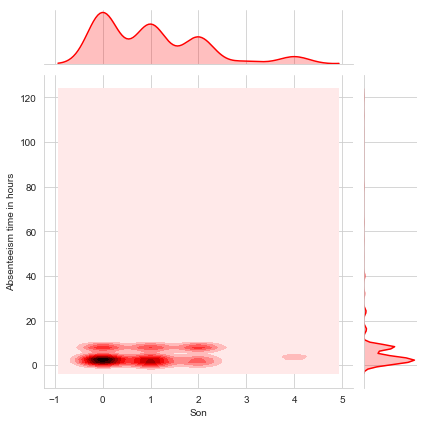

In [149]:
sns.jointplot(x='Son', y='Absenteeism time in hours', data=df, color='red', kind='kde')

In [150]:
#sns.jointplot(x='Transportation expense', y='Hit target', data=df, color='red', kind='kde')

# Creating a countplot for the group age of employees

Text(0.5, 0, 'Age')

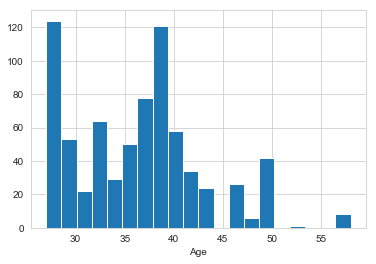

In [151]:
sns.set_style('whitegrid')
df['Age'].hist(bins=20)
plt.xlabel('Age')

In [152]:
#sns.pairplot(df,hue='Disciplinary failure',palette='bwr')

In [153]:
#plt.show()

In [154]:
#sns.jointplot(x='Service time',y='Hit target',data=df)

# Creating a count plot for the reasons of absence

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text yticklabel objects>)

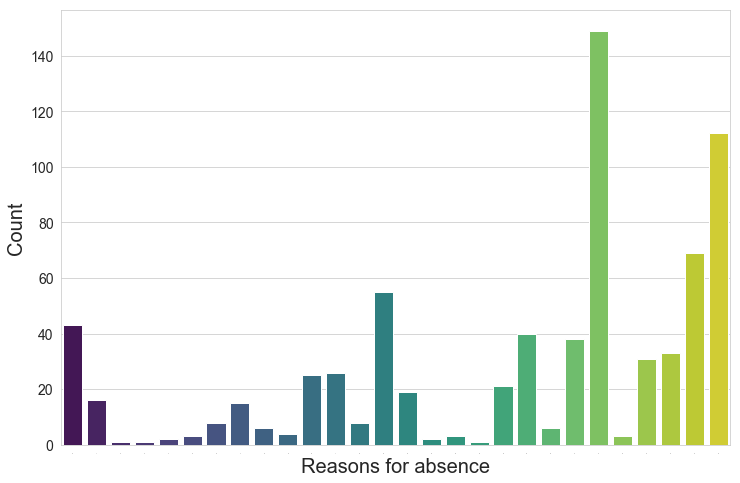

In [155]:
plt.figure(figsize=(12,8))
sns.countplot(x='Reason for absence',data=df,palette='viridis')
plt.xlabel('Reasons for absence', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=1)
plt.yticks(fontsize=14)

## Interpretation of some reasons of absence
* medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28)



# Creating new features

In [156]:
# df['Month'] = pd.to_datetime(df['Month of absence'])
# df['Day of Week'] = pd.to_datetime(df['Day of Week'])

In [157]:
#df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
# df['Month'] = df['Month of absence'].apply(lambda time: time.month)
# df['Day of Week'] = df['Day of the week'].apply(lambda time: time.dayofweek)

In [158]:
#dmap = {1:'Sun',2:'Mon',3:'Tue',4:'Wed',5:'Thu',6:'Fri'}

In [159]:
#df['Day of the week'] = df['Day of the week'].map(dmap)

In [160]:
#dmap = {1:'summer',2:'autumn',3:'winter',4:'spring'}

In [161]:
#df['Absenteeism time in hours '] = pd.to_numeric(df['Absenteeism time in hours'])

In [162]:
#df['Seasons'] = df['Seasons'].map(dmap)

In [163]:
df['medical_consult_dummy'] = (df['Reason for absence'] == 23).astype(int)
df['dental_consult_dummy'] = (df['Reason for absence'] == 28).astype(int)
df['genitourinary_dummy'] = (df['Reason for absence'] == 14).astype(int)
dow = pd.get_dummies(df['Day of the week'])
dow.columns = ['mon_dummy', 'tue_dummy', 'wed_dummy', 'thu_dummy' ,'fri_dummy']
df = pd.concat([df, dow], axis=1)
print(df.shape)

(740, 29)


In [164]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
# Droping rows where Absenteeism time in hours is greater than

In [171]:
df1 = df[df['Absenteeism_time_in_hours'] < 24]

In [174]:
df1.shape

(696, 29)

In [23]:
predictors = ['Month_of_absence', 
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Body_mass_index', 'medical_consult_dummy',
       'dental_consult_dummy', 'genitourinary_dummy', 'mon_dummy', 'tue_dummy',
       'wed_dummy', 'thu_dummy', 'fri_dummy']

In [28]:
df.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours', 'medical_consult_dummy',
       'dental_consult_dummy', 'genitourinary_dummy', 'mon_dummy', 'tue_dummy',
       'wed_dummy', 'thu_dummy', 'fri_dummy'],
      dtype='object')

In [112]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(df[predictors], df['Absenteeism_time_in_hours'])

In [113]:
df[predictors].columns[selector.support_ ]

Index(['Disciplinary_failure', 'medical_consult_dummy', 'dental_consult_dummy',
       'mon_dummy', 'tue_dummy'],
      dtype='object')

In [114]:
X = df[['Disciplinary_failure', 'medical_consult_dummy', 'dental_consult_dummy',
       'mon_dummy', 'tue_dummy']]

In [115]:
y = df['Absenteeism_time_in_hours']

In [116]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=101)

In [117]:
linreg = LinearRegression()
model1 = linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [118]:
np.sqrt(mean_squared_error(y_test, y_pred))

13.18117814934265

In [119]:
r2_score(y_test, y_pred)

0.06835854028440269

In [ ]:

plt.figure(figsize=(16,12))
df_two_vars.plot()
plt.xlabel('Day of the week', fontsize=20)
plt.ylabel('Absenteeism times in hours', fontsize=20)
plt.xticks(fontsize=1)
plt.yticks(fontsize=14)

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

In [ ]:
sns.lmplot(x='Reason for absence',y='Hit target',data=df)

## Training and Testing Data
Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [ ]:
y = df['Absenteeism time in hours']

In [ ]:
X = ['Reason for absence', 'Month of absence', 'Day of the week','Seasons']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [132]:
advertising = pd.read_csv('advertising.csv')

FileNotFoundError: [Errno 2] File b'advertising.csv' does not exist: b'advertising.csv'

In [ ]:
advertising.head()

In [ ]:
advertising.head()